<a href="https://colab.research.google.com/github/adrynalean/Summer_Projects/blob/MNIST_machine/MNIST_Recognition_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
# Setting up imports

In [82]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [83]:
# set manual seed for reproducibility
torch.manual_seed(42)

if torch.cuda.is_available():
  torch.cuda.manual_seed(42)

In [84]:
# Defining transformation

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])


In [85]:
# Preparing data sets

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


# # Verify Data

# examples = enumerate(train_loader)
# batch_idx, (example_data, example_targets) = next(examples)

# fig = plt.figure()
# for i in range(6):
#     plt.subplot(2, 3, i+1)
#     plt.tight_layout()
#     plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
#     plt.title(f"Label: {example_targets[i]}")
#     plt.xticks([])
#     plt.yticks([])
# plt.show()

In [86]:
# Making the Model
class MNIST_model0(nn.Module):
  def __init__(self):
    super(MNIST_model0, self).__init__()
    self.layer_1 = nn.Linear(28*28, 512)
    self.layer_2 = nn.Linear(512, 256)
    self.layer_3 = nn.Linear(256, 10)

  def forward(self, x):
    x = x.view(-1, 28*28)  # This flattens the image into one huge array
    x = torch.relu(self.layer_1(x))
    x = torch.relu(self.layer_2(x))
    x = self.layer_3(x)

    return x


model1 = MNIST_model0()
model1

MNIST_model0(
  (layer_1): Linear(in_features=784, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=256, bias=True)
  (layer_3): Linear(in_features=256, out_features=10, bias=True)
)

In [87]:
# Device agnostic Code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model1.to(device)

MNIST_model0(
  (layer_1): Linear(in_features=784, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=256, bias=True)
  (layer_3): Linear(in_features=256, out_features=10, bias=True)
)

In [88]:
# Defining a loss function and a optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model1.parameters(), lr = 0.001)

In [89]:
# Let's train the model!

epochs = 5

for epoch in range(epochs):

  model1.train()
  train_loss = 0
  correct = 0
  total = 0


  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
     # 1. Zero Grad
    optimizer.zero_grad()

    # 2. Forward Pass
    output = model1(data)

    # 3. Calculate the loss
    loss = criterion(output, target)

    # 4. Backpropogation
    loss.backward()

    # 5. Optimizer step ( updating the weights )
    optimizer.step()



    train_loss += loss.item()
    _, predicted = torch.max(output.data, 1)
    total += target.size(0)
    correct += (predicted == target).sum().item()

  train_acc = 100 * correct / total


  ### Testing
  model1.eval()
  test_loss = 0
  correct = 0
  total = 0

  with torch.inference_mode():
    for data, target in test_loader:
      data, target = data.to(device), target.to(device)

      output = model1(data)
      loss = criterion(output, target)
      test_loss += loss.item()
      _, predicted = torch.max(output.data, 1)
      total += target.size(0)
      correct += (predicted == target).sum().item()

    test_acc = 100 * correct / total

In [90]:
# Let's print it out

print(f'Epoch {epoch+1}/{epochs}, '
        f'Train Loss: {train_loss/len(train_loader):.4f}, '
        f'Train Acc: {train_acc:.2f}%, '
        f'Test Loss: {test_loss/len(test_loader):.4f}, '
        f'Test Acc: {test_acc:.2f}%')

Epoch 5/5, Train Loss: 0.0370, Train Acc: 98.81%, Test Loss: 0.0732, Test Acc: 97.87%


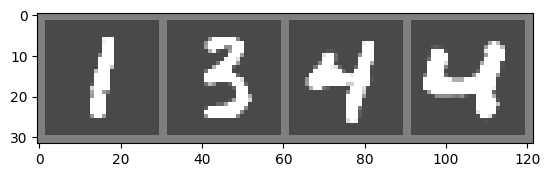

GroundTruth:      1     3     4     4
Predicted:      1     3     4     4


In [91]:
# Visualize Visualize Visualize
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Load the test dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=True)

# Get some random test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % labels[j].item() for j in range(4)))

# Move the images to the appropriate device
images = images.to(device)

# Predict the classes
model1.eval()  # Set the model to evaluation mode
outputs = model1(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % predicted[j].item() for j in range(4)))




In [92]:
# Let's save our model

torch.save(model1.state_dict(), 'mnist_model.pth')
print("Model saved successfully.")

Model saved successfully.
